In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mock_kaggle.csv') 
df.head(3)

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29


In [3]:
df.columns

Index(['data', 'venda', 'estoque', 'preco'], dtype='object')

In [4]:
replace_columns = {
    'data': 'date',
    'venda': 'sales',
    'estoque':'stock',
    'preco': 'price'
}

In [5]:
df = df.rename(columns = replace_columns)

In [6]:
df.columns

Index(['date', 'sales', 'stock', 'price'], dtype='object')

In [7]:
df.isnull().sum()

date     0
sales    0
stock    0
price    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    937 non-null    object 
 1   sales   937 non-null    int64  
 2   stock   937 non-null    int64  
 3   price   937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [9]:
df.shape

(937, 4)

In [10]:
df.describe()

,sales,stock,price
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.dtypes

date      object
sales      int64
stock      int64
price    float64
dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.set_index('date', inplace=True)

In [15]:
df.sort_index(inplace=True)

In [16]:
df.head()

,sales,stock,price
date,,,
2014-01-01,0,4972,1.29
2014-01-02,70,4902,1.29
2014-01-03,59,4843,1.29
2014-01-04,93,4750,1.29
2014-01-05,96,4654,1.29


## Time Based Feature

In [17]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

## Lag Features

In [18]:
df['lag_1'] = df['sales'].shift(1)
df['lag_7'] = df['sales'].shift(7)
df['lag_30'] = df['sales'].shift(30)

## Rolling Static Feature

In [19]:
df['rolling_mean_7'] = df['sales'].rolling(window=7).mean()
df['rolling_std_7'] = df['sales'].rolling(window=7).std()

df['rolling_mean_30'] = df['sales'].rolling(window=30).mean()
df['rolling_std_30'] = df['sales'].rolling(window=30).std()

In [20]:
df.isnull().sum()

sales               0
stock               0
price               0
year                0
month               0
day                 0
day_of_week         0
is_weekend          0
lag_1               1
lag_7               7
lag_30             30
rolling_mean_7      6
rolling_std_7       6
rolling_mean_30    29
rolling_std_30     29
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(907, 15)

In [23]:
df.head()

,sales,stock,price,year,month,day,day_of_week,is_weekend,lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30
date,,,,,,,,,,,,,,,
2014-02-01,369,2145,0.99,2014,2,1,5,1,209.0,198.0,0.0,207.285714,94.501701,145.133333,76.302363
2014-02-02,217,1928,0.99,2014,2,2,6,1,369.0,168.0,70.0,214.285714,92.908045,150.033333,76.030612
2014-02-03,97,1831,0.99,2014,2,3,0,0,217.0,125.0,59.0,210.285714,97.863364,151.300000,74.767755
2014-02-04,117,1714,0.99,2014,2,4,1,0,97.0,86.0,93.0,214.714286,91.816328,152.100000,74.249045
2014-02-05,100,1998,1.29,2014,2,5,2,0,117.0,222.0,96.0,197.285714,101.292833,152.233333,74.148352


In [24]:
df.columns.to_list()

['sales',
 'stock',
 'price',
 'year',
 'month',
 'day',
 'day_of_week',
 'is_weekend',
 'lag_1',
 'lag_7',
 'lag_30',
 'rolling_mean_7',
 'rolling_std_7',
 'rolling_mean_30',
 'rolling_std_30']

In [25]:
monthly_sales = df.groupby('stock')['sales'].resample('ME').sum().reset_index()
monthly_sales

,stock,date,sales
0,0,2014-11-30,290
1,0,2014-12-31,0
2,0,2015-01-31,0
3,0,2015-02-28,0
4,0,2015-03-31,0
...,...,...,...
1575,6875,2014-02-28,87
1576,6962,2014-02-28,116
1577,7078,2014-02-28,107
1578,7185,2014-02-28,43


In [26]:
monthly_total = df['sales'].resample('ME').sum()
monthly_total

date
2014-02-28    2018
2014-03-31    2137
2014-04-30    1990
2014-05-31    2493
2014-06-30    2629
2014-07-31    1131
2014-08-31    1452
2014-09-30    2185
2014-10-31    2765
2014-11-30    1462
2014-12-31    1010
2015-01-31    2465
2015-02-28    1918
2015-03-31    3379
2015-04-30    2123
2015-05-31     647
2015-06-30    2880
2015-07-31    3104
2015-08-31    1826
2015-09-30    2790
2015-10-31    3974
2015-11-30    3214
2015-12-31    3914
2016-01-31    2365
2016-02-29    2832
2016-03-31    2206
2016-04-30    4028
2016-05-31    4407
2016-06-30    6347
2016-07-31    5154
Freq: ME, Name: sales, dtype: int64

In [27]:
weekly_sales = df['sales'].resample('W').sum()
weekly_sales

date
2014-02-02     586
2014-02-09     522
2014-02-16     361
2014-02-23     331
2014-03-02     371
              ... 
2016-07-03    1237
2016-07-10     990
2016-07-17    1431
2016-07-24    1022
2016-07-31     946
Freq: W-SUN, Name: sales, Length: 131, dtype: int64

## Visualize Monthly Sales Trend

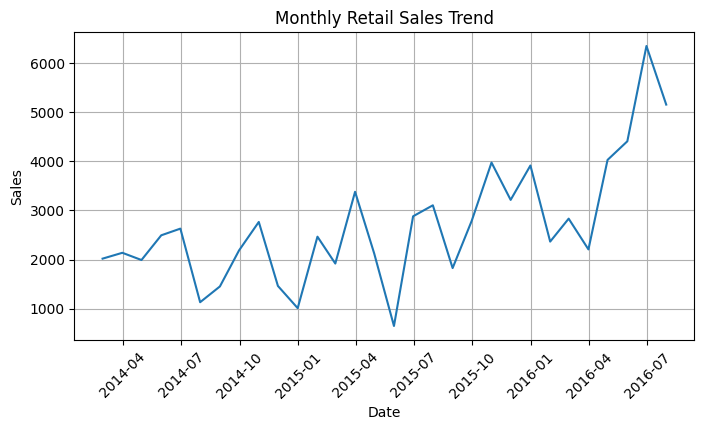

In [28]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_total)
plt.title("Monthly Retail Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

## weekly Trend

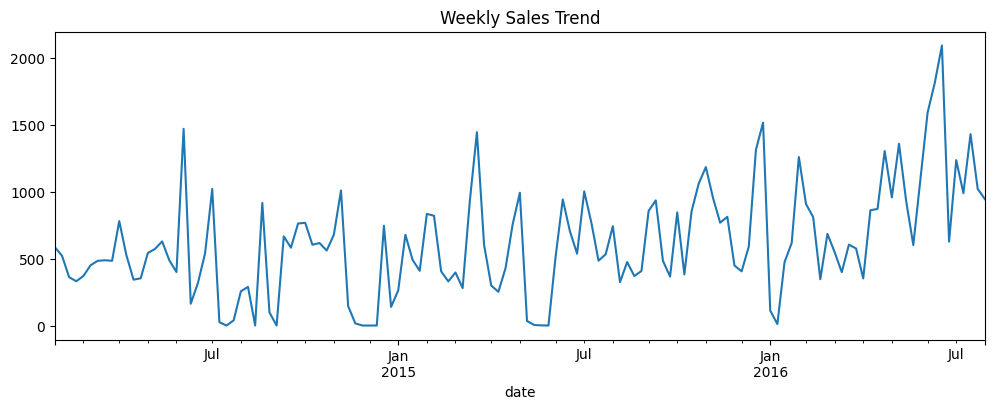

In [29]:
df['sales'].resample('W').sum().plot(figsize=(12, 4), title='Weekly Sales Trend')
plt.show()

## Monthly Sales Pattern

In [30]:
monthly_avg = df.groupby('month')['sales'].mean()
monthly_avg

month
1      77.903226
2      81.542169
3      84.857143
4      90.455556
5      81.150538
6     131.733333
7     100.956989
8      53.737705
9      82.916667
10    108.693548
11     77.933333
12     79.419355
Name: sales, dtype: float64

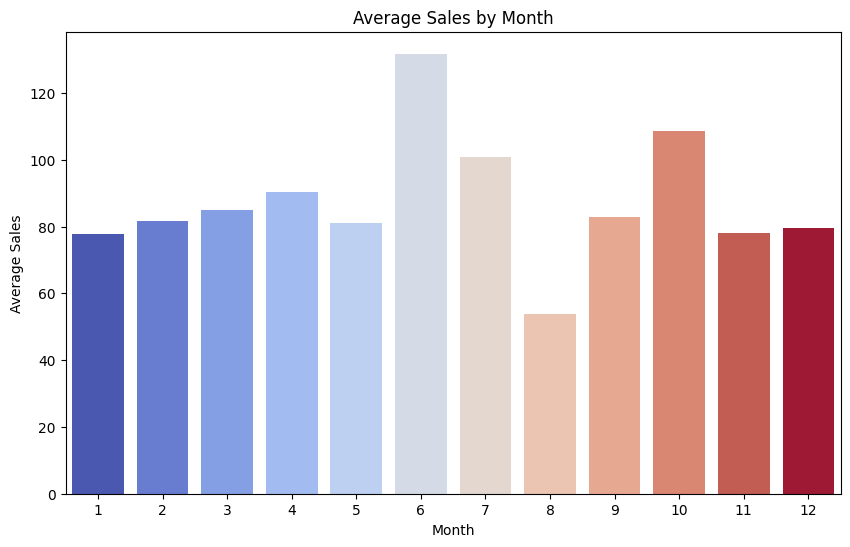

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm', hue = monthly_avg.index, legend=False)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

## Day of week Sales pattern

In [32]:
dow_avg = df.groupby('day_of_week')['sales'].mean()
dow_avg

day_of_week
0     67.406250
1     66.257812
2     89.592308
3     74.815385
4     88.807692
5    140.961538
6     95.366412
Name: sales, dtype: float64

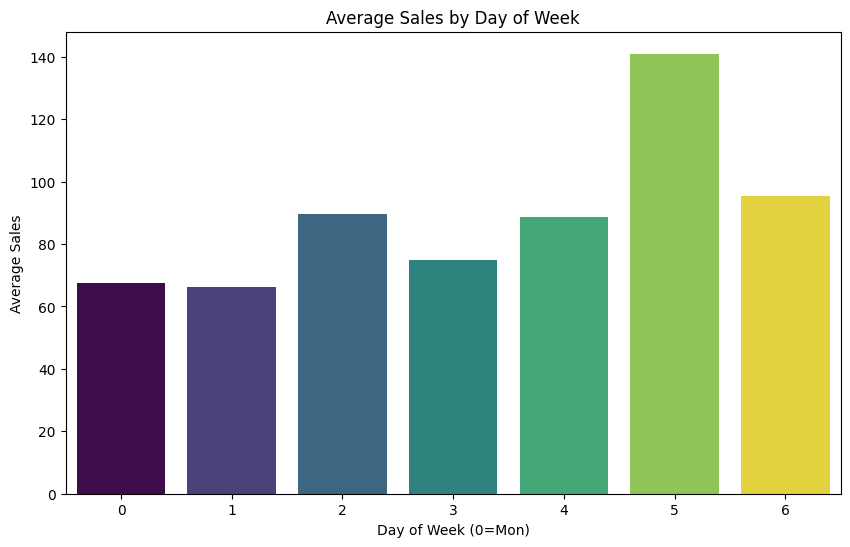

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dow_avg.index, y=dow_avg.values, palette='viridis', hue=dow_avg.index, legend=False)
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Sales')
plt.show()

## Total Sales by Stock

In [34]:
stock_sales = df.groupby('stock')['sales'].sum().sort_values(ascending=False)
stock_sales

stock
0       1283
175      542
1196     522
2187     512
1075     489
        ... 
2328       0
2143       0
1151       0
2383       0
688        0
Name: sales, Length: 694, dtype: int64

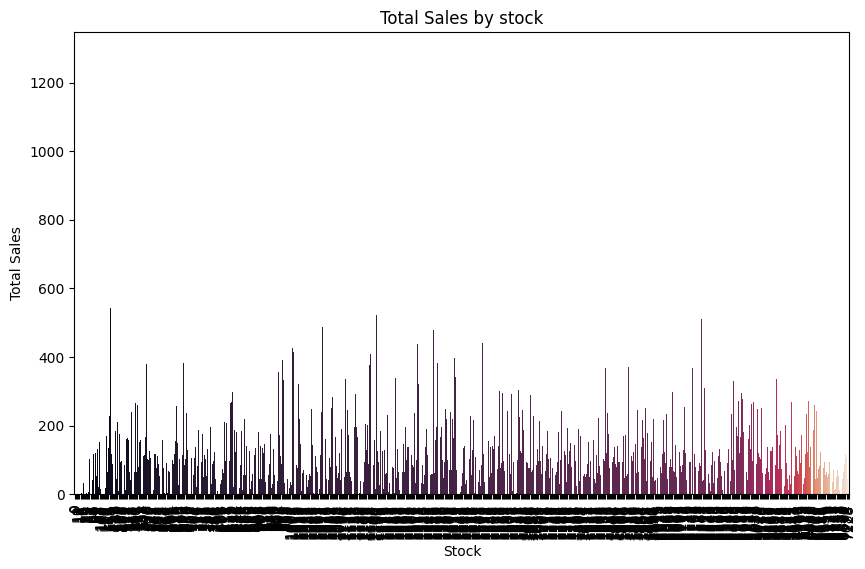

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x = stock_sales.index, y=stock_sales.values, hue=stock_sales.index, palette='rocket', legend=False)
plt.title('Total Sales by stock')
plt.xlabel('Stock')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis

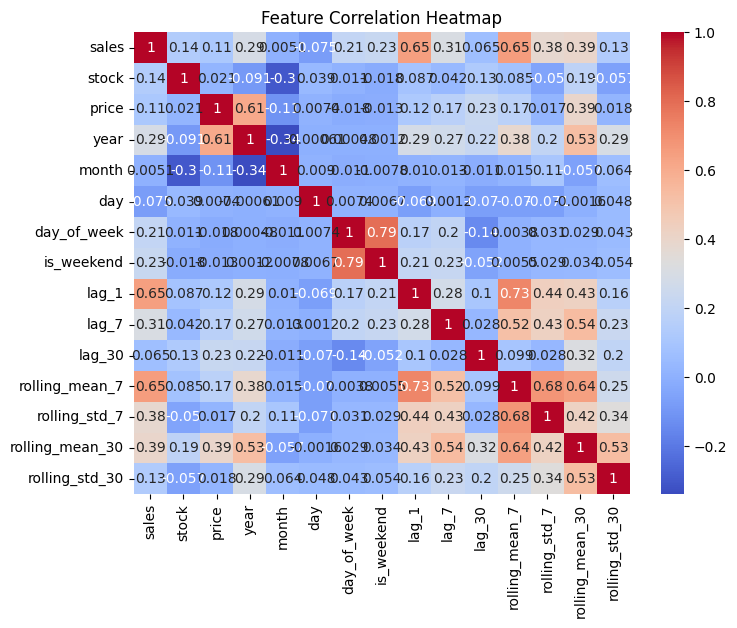

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [37]:
df.describe()

,sales,stock,price,year,month,day,day_of_week,is_weekend,lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,89.134509,1521.721058,1.607211,2014.872106,6.140022,15.726571,3.014333,0.287762,89.163175,89.502756,88.117971,89.229170,49.531773,89.044469,66.391183
std,80.713455,1284.327170,0.531633,0.762797,3.277662,8.802104,1.999673,0.452969,80.751437,80.989485,79.695228,58.435673,34.359014,40.443878,24.576963
min,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.639684
25%,31.000000,788.500000,1.290000,2014.000000,3.000000,8.000000,1.000000,0.000000,31.000000,31.000000,31.000000,53.000000,25.854896,65.400000,45.898189
50%,73.000000,1311.000000,1.390000,2015.000000,6.000000,16.000000,3.000000,0.000000,73.000000,74.000000,73.000000,81.285714,43.379829,83.800000,66.436038
75%,125.000000,1902.500000,1.890000,2015.000000,9.000000,23.000000,5.000000,1.000000,125.000000,126.000000,123.000000,119.357143,67.133917,106.550000,81.748860
max,542.000000,7228.000000,2.980000,2016.000000,12.000000,31.000000,6.000000,1.000000,542.000000,542.000000,542.000000,311.285714,198.131630,229.933333,126.024833


## Model Building

In [38]:
target = 'sales'
feature = df.drop(columns=['sales', 'date'], errors='ignore').columns

In [39]:
x = df[feature]
y = df[target]

In [40]:
x.shape, y.shape

((907, 14), (907,))

In [41]:
split_index = int(len(df)* 0.8)
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [42]:
x_train.shape, y_train.shape

((725, 14), (725,))

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(48.52692017483861, 50.879479107424345)

In [46]:
mean_squared_error(y_test, lr.predict(x_test))

3975.030136009535

In [47]:
mean_absolute_error(y_test, lr.predict(x_test))

47.88138479243527

In [48]:
r2_score(y_test, lr.predict(x_test))

0.5087947910742434

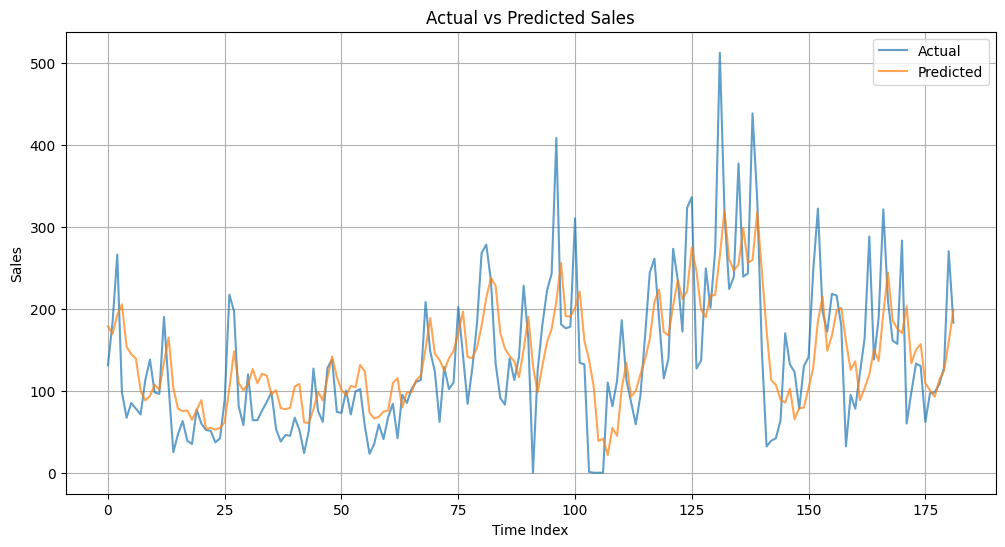

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(lr.predict(x_test), label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.grid(True) 
plt.show()

## XGBoost Model

In [50]:
from xgboost import XGBRegressor

In [51]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
xgb.score(x_train, y_train)*100, xgb.score(x_test, y_test)*100

(99.91516470909119, 35.2078914642334)

In [53]:
mean_absolute_error(y_test, xgb.predict(x_test))

51.702396392822266

In [54]:
mean_squared_error(y_test, xgb.predict(x_test))

5243.23779296875

In [55]:
r2_score(y_test, xgb.predict(x_test))

0.352078914642334

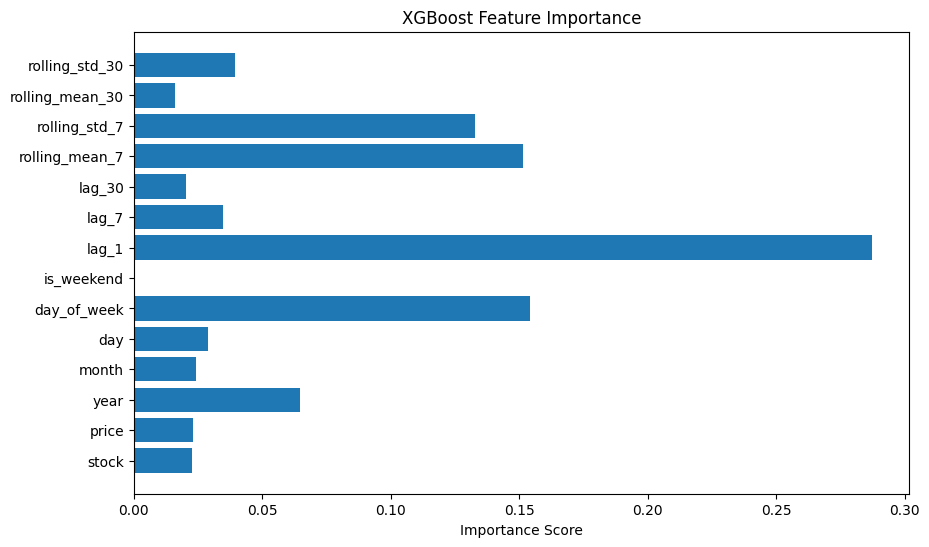

In [56]:
importances = xgb.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(x.columns, importances)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.show()

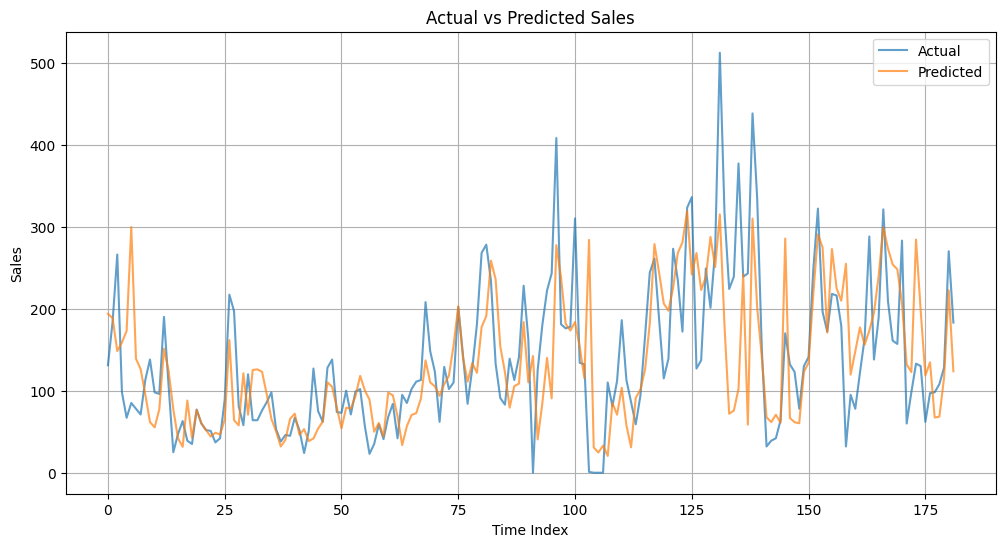

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(xgb.predict(x_test), label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.grid(True) 
plt.show()

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators=100, random_state=44)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=44)

In [60]:
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(93.85168616155327, 50.75377910641852)

In [61]:
mean_squared_error(y_test, rf.predict(x_test))

3985.2022857142856

In [62]:
mean_absolute_error(y_test, rf.predict(x_test))

45.123296703296695

In [63]:
r2_score(y_test, rf.predict(x_test))

0.5075377910641852

## plot actual vs predicted

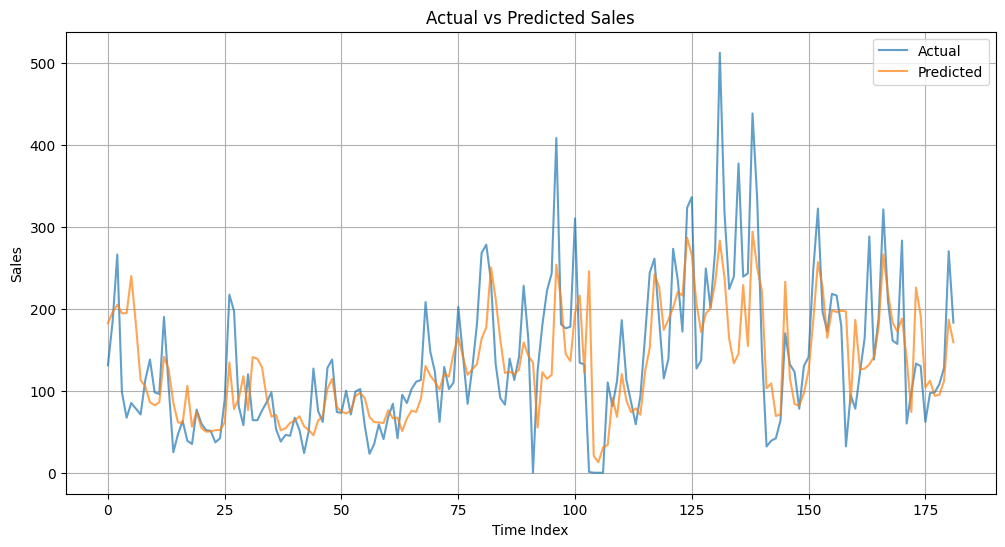

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(rf.predict(x_test), label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.grid(True) 
plt.show()

## Feature Importance for random forest

In [65]:
rf_importances = rf.feature_importances_

In [66]:
rf_feat_imp = pd.DataFrame({
    'Feature':x.columns, 
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

In [67]:
rf_feat_imp

,Feature,Importance
7,lag_1,0.372667
10,rolling_mean_7,0.163010
11,rolling_std_7,0.151240
5,day_of_week,0.063417
0,stock,0.039551
13,rolling_std_30,0.034489
8,lag_7,0.033751
4,day,0.030626
12,rolling_mean_30,0.030613
9,lag_30,0.026748


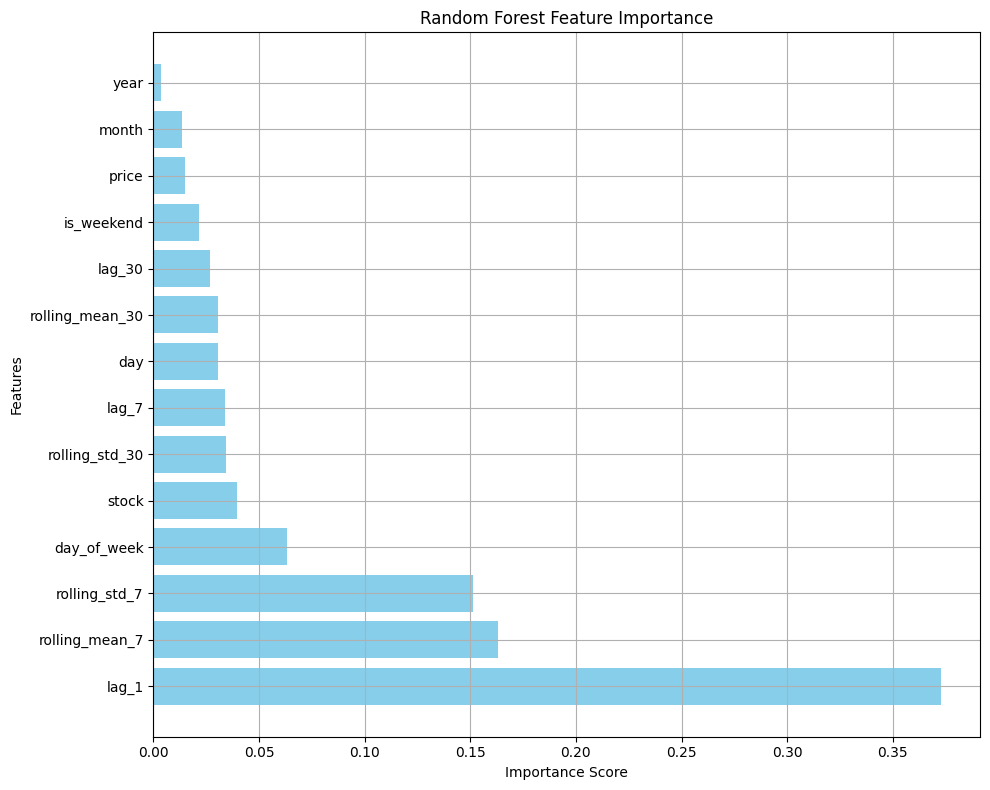

In [68]:
plt.figure(figsize=(10, 8))
plt.barh(rf_feat_imp['Feature'], rf_feat_imp['Importance'], color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

##  Hyperparameter Tuning for Random Forest using RandomizedSearchCV

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [71]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # number of parameter settings sampled
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # use all processors
)

In [72]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/sabin/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
63 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sabin/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sabin/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/sabin/myenv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/sabin/myenv/lib/pyth

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=44),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [73]:
best_params = random_search.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [74]:
best_rf = random_search.best_estimator_
best_rf

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=300, random_state=44)

## Save the model

In [75]:
import joblib

In [76]:
joblib.dump(rf, "random_forest_model.joblib")

['random_forest_model.joblib']

In [77]:
#load the Model
model = joblib.load('random_forest_model.joblib')

In [78]:
prediction = model.predict(x_test)

In [79]:
prediction

array([182.31, 195.69, 204.76, 194.39, 194.48, 239.76, 180.28, 112.87,
       105.18,  85.85,  82.29,  85.67, 141.27, 126.05,  85.37,  61.23,
        60.81, 105.87,  56.  ,  74.41,  54.61,  50.07,  50.38,  51.87,
        52.1 ,  61.3 , 134.34,  77.56,  90.44, 117.65,  76.32, 140.91,
       139.  , 128.23,  90.87,  68.48,  70.33,  51.7 ,  54.15,  60.66,
        63.57,  68.87,  56.65,  51.9 ,  45.63,  63.59,  69.47, 102.52,
       114.38,  80.21,  74.54,  72.34,  74.96,  93.44,  97.39,  90.86,
        67.91,  61.76,  61.39,  60.49,  76.07,  66.32,  67.15,  50.64,
        66.09,  75.71,  74.06,  90.3 , 130.07, 118.48, 110.97, 101.47,
       120.82, 117.23, 145.55, 165.01, 141.71, 119.32, 126.13, 132.24,
       163.47, 177.18, 250.25, 212.5 , 162.29, 121.51, 123.29, 119.8 ,
       125.56, 158.9 , 142.67, 134.02,  54.99, 122.52, 114.36, 119.34,
       253.69, 210.63, 144.8 , 136.17, 194.61, 215.97, 122.05, 245.55,
        20.68,  12.69,  30.81,  33.9 ,  90.89,  68.11, 120.24,  87.91,
      

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   6.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   7.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   8.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   2.0s
[CV] END max_depth=30, max_features